## Detect outlier using IQR

Case 1: Salaries
Outliers: [12000]


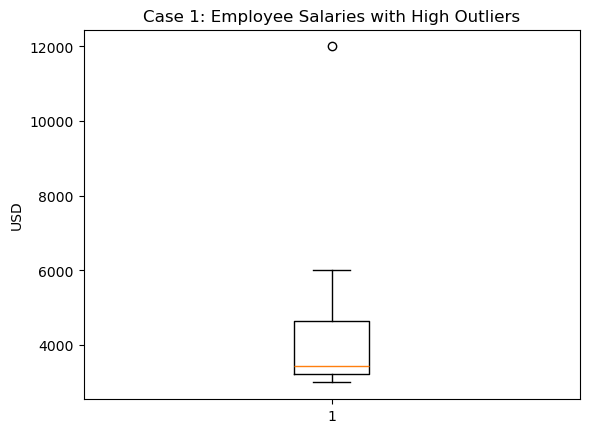


Case 2: Temperatures
Outliers: []


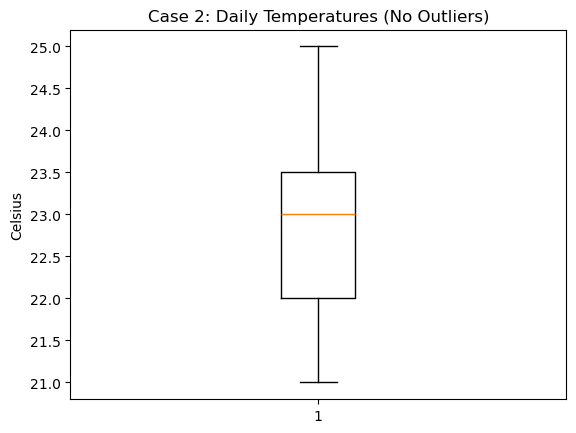


Case 3: Body Weights
Outliers: [110, 5]


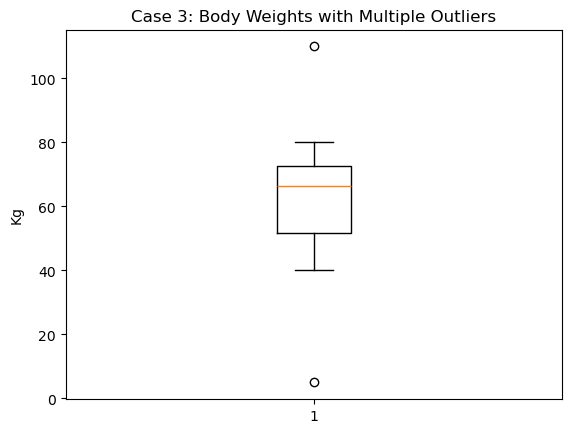

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Function to detect outliers using IQR
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    return outliers, lower_bound, upper_bound

# -----------------------------
# Case 1: Employee Salaries (few outliers on high end)
salaries = [3000, 3200, 3100, 3300, 3500, 3400, 3550, 5000, 6000, 12000]

outliers1, lb1, ub1 = detect_outliers_iqr(salaries)
print("Case 1: Salaries")
print("Outliers:", outliers1)

plt.boxplot(salaries)
plt.title("Case 1: Employee Salaries with High Outliers")
plt.ylabel("USD")
plt.show()

# -----------------------------
# Case 2: Daily Temperatures (no real outliers)
temperatures = [22, 23, 21, 24, 22, 23, 25, 22, 24, 23, 22]

outliers2, lb2, ub2 = detect_outliers_iqr(temperatures)
print("\nCase 2: Temperatures")
print("Outliers:", outliers2)

plt.boxplot(temperatures)
plt.title("Case 2: Daily Temperatures (No Outliers)")
plt.ylabel("Celsius")
plt.show()

# -----------------------------
# Case 3: Body Weights (outliers on both sides)
weights = [40, 42, 55, 60, 65, 68, 70, 72, 75, 80, 110, 5]

outliers3, lb3, ub3 = detect_outliers_iqr(weights)
print("\nCase 3: Body Weights")
print("Outliers:", outliers3)

plt.boxplot(weights)
plt.title("Case 3: Body Weights with Multiple Outliers")
plt.ylabel("Kg")
plt.show()



## Define boundaries and remove outlers

In [4]:
import pandas as pd

# Sample DataFrame
data = {
    "col": [10, 12, 11, 13, 15, 14, 12, 100, 11, 13, 12, 10]  # 100 is an outlier
}
df = pd.DataFrame(data)
print("Original DataFrame:\n", df)

# Compute Q1, Q3 and IQR
Q1 = df['col'].quantile(0.25)
Q3 = df['col'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

print("\nLower Bound:", lower)
print("Upper Bound:", upper)

# Remove outliers
df_no_outliers = df[(df['col'] >= lower) & (df['col'] <= upper)]
print("\nDataFrame without outliers:\n", df_no_outliers)


Original DataFrame:
     col
0    10
1    12
2    11
3    13
4    15
5    14
6    12
7   100
8    11
9    13
10   12
11   10

Lower Bound: 7.625
Upper Bound: 16.625

DataFrame without outliers:
     col
0    10
1    12
2    11
3    13
4    15
5    14
6    12
8    11
9    13
10   12
11   10


## Transform data 

Original data:
 0    1
1    2
2    3
3    4
4    5
Name: col, dtype: int64

Log-transformed data:
 0    0.693147
1    1.098612
2    1.386294
3    1.609438
4    1.791759
Name: log_col, dtype: float64


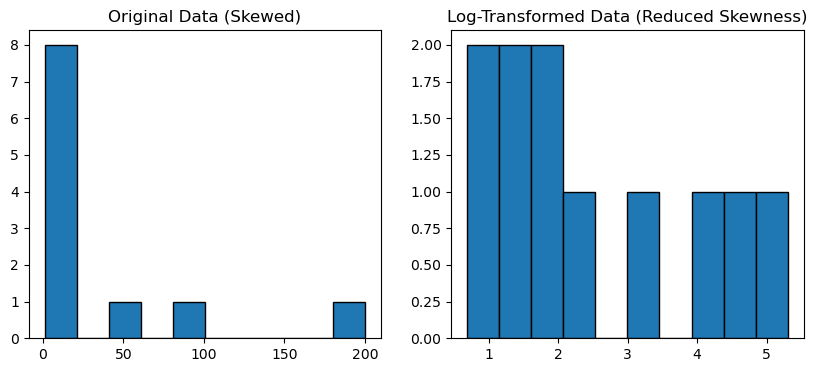

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame with skewed data
df = pd.DataFrame({
    "col": [1, 2, 3, 4, 5, 6, 10, 20, 50, 100, 200]
})

# Apply log transformation (log1p handles 0 safely)
df["log_col"] = np.log1p(df["col"])

print("Original data:\n", df["col"].head())
print("\nLog-transformed data:\n", df["log_col"].head())

# Compare distributions visually
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.hist(df["col"], bins=10, edgecolor="black")
plt.title("Original Data (Skewed)")

plt.subplot(1,2,2)
plt.hist(df["log_col"], bins=10, edgecolor="black")
plt.title("Log-Transformed Data (Reduced Skewness)")

plt.show()


## Impute Outliers 
###        (Replace them with mean, median, or other statistics:)

In [6]:
import pandas as pd

# Sample data (with outliers)
df = pd.DataFrame({
    "col": [10, 12, 11, 13, 15, 14, 12, 100, 11, 13, 12, 10]  # 100 is an outlier
})

print("Original Data:\n", df)

# Step 1: Compute IQR
Q1 = df['col'].quantile(0.25)
Q3 = df['col'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Bounds
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

# Step 3: Replace outliers with median
median = df['col'].median()
df.loc[df['col'] > upper, 'col'] = median
df.loc[df['col'] < lower, 'col'] = median

print("\nAfter replacing outliers with median:\n", df)


Original Data:
     col
0    10
1    12
2    11
3    13
4    15
5    14
6    12
7   100
8    11
9    13
10   12
11   10

After replacing outliers with median:
     col
0    10
1    12
2    11
3    13
4    15
5    14
6    12
7    12
8    11
9    13
10   12
11   10


## Data Transformation

**Encoding categorical variables**

1.   Label Encoding → Converts categories to numbers (e.g., Male=0, Female=1).
2.   One-Hot Encoding → Creates binary columns (e.g., Red=[1,0,0], Blue=[0,1,0], Green=[0,0,1]).

**Scaling numerical variables**


1.   Normalization (Min-Max Scaling) → Scales values between 0 and 1.
2.   Standardization (Z-score Scaling) → Converts to mean=0 and std=1.\
3.   Robust Scaling → Uses median & IQR (good when outliers exist).

**Binning**

1.  Converts continuous data into categories (e.g., age groups: Child, Adult, Senior).

### 1. Encoding Categorical Variables

a) Label Encoding

* Useful when categories have some order (like Low < Medium < High).

* Converts labels into numeric form.

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Sample dataset with categorical values
data = {
    'City': ['Paris', 'London', 'New York', 'London', 'Paris', 'Tokyo', 'Tokyo']
}
df = pd.DataFrame(data)

# Apply Label Encoding
le = LabelEncoder()
df['City_Label'] = le.fit_transform(df['City'])

print(df)
print("\nMapping:", dict(zip(le.classes_, le.transform(le.classes_))))


       City  City_Label
0     Paris           2
1    London           0
2  New York           1
3    London           0
4     Paris           2
5     Tokyo           3
6     Tokyo           3

Mapping: {'London': np.int64(0), 'New York': np.int64(1), 'Paris': np.int64(2), 'Tokyo': np.int64(3)}


b) One-Hot Encoding

* Useful for non-ordinal categories like Red, Blue, Green.

In [8]:
import pandas as pd

# Sample data
df_fruits = pd.DataFrame({'Fruit': ['Apple', 'Banana', 'Grape', 'Banana', 'Apple']})
print("Original DataFrame:\n", df_fruits)

# One-Hot Encoding
df_onehot = pd.get_dummies(df_fruits, columns=['Fruit'])
print("\nOne-Hot Encoded DataFrame:\n", df_onehot)


Original DataFrame:
     Fruit
0   Apple
1  Banana
2   Grape
3  Banana
4   Apple

One-Hot Encoded DataFrame:
    Fruit_Apple  Fruit_Banana  Fruit_Grape
0         True         False        False
1        False          True        False
2        False         False         True
3        False          True        False
4         True         False        False


## 2. Scaling Numerical Variables
a) Normalization (Min-Max Scaling)

* Scales values into 0 → 1 range.

In [13]:
from sklearn.preprocessing import MinMaxScaler

# Sample dataset
data = {
    "Age": [20, 25, 30, 35, 40],
    "Salary": [2000, 3000, 4000, 6000, 12000]
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Apply MinMaxScaler
scaler = MinMaxScaler()
scaled = scaler.fit_transform(df)

# Convert back to DataFrame for readability
df_scaled = pd.DataFrame(scaled, columns=df.columns)
print("\nScaled Data (0–1 range):\n", df_scaled)


Original Data:
   Age  Salary
0   20    2000
1   25    3000
2   30    4000
3   35    6000
4   40   12000

Scaled Data (0–1 range):
     Age  Salary
0  0.00     0.0
1  0.25     0.1
2  0.50     0.2
3  0.75     0.4
4  1.00     1.0


b) Standardization (Z-score Scaling)

* Centers data around mean=0 and std=1.

In [9]:
from sklearn.preprocessing import StandardScaler

# Original salaries
salaries = [[3000], [4000], [5000], [6000], [10000]]

# Apply StandardScaler
scaler_std = StandardScaler()
scaled_std = scaler_std.fit_transform(salaries)

print("Original Salaries:", salaries)
print("Standardized Salaries:\n", scaled_std)


Original Salaries: [[3000], [4000], [5000], [6000], [10000]]
Standardized Salaries:
 [[-1.07588766]
 [-0.66208471]
 [-0.24828177]
 [ 0.16552118]
 [ 1.82073295]]


c) Robust Scaling

* Better when outliers exist because it uses median and IQR.

In [10]:
from sklearn.preprocessing import RobustScaler

# Sample dataset with outlier
data = {
    "Age": [25, 30, 35, 40, 45],
    "Salary": [3000, 4000, 5000, 6000, 100000]  # big outlier
}
df = pd.DataFrame(data)
print("Original Data:\n", df)

# Apply RobustScaler
scaler = RobustScaler()
scaled = scaler.fit_transform(df)

# Convert back to DataFrame
df_scaled = pd.DataFrame(scaled, columns=df.columns)
print("\nRobust Scaled Data:\n", df_scaled)


Original Data:
    Age  Salary
0   25    3000
1   30    4000
2   35    5000
3   40    6000
4   45  100000

Robust Scaled Data:
    Age  Salary
0 -1.0    -1.0
1 -0.5    -0.5
2  0.0     0.0
3  0.5     0.5
4  1.0    47.5


## 3. Binning (Discretization)

Convert continuous values (like Age) into categories.

In [14]:
ages = [5, 12, 17, 25, 40, 60, 75]
df_ages = pd.DataFrame({'Age': ages})

# Define bins
bins = [0, 12, 19, 35, 60, 100]
labels = ['Child', 'Teen', 'Young Adult', 'Adult', 'Senior']

df_ages['Age_Group'] = pd.cut(df_ages['Age'], bins=bins, labels=labels)
df_ages

,Age,Age_Group
0,5,Child
1,12,Child
2,17,Teen
3,25,Young Adult
4,40,Adult
5,60,Adult
6,75,Senior
